# Data Scientist Nanodegree
## Introduction to Data Science
## Project: Write a Data Science Blog

## Business Understanding

In this project, the objective is to pick a dataset of your own choice and answer at least 3 questions related to business or real-world applications of how the data could be used. 

4 Questions To Be Answered:
1. What time of the day do accidents happen more?
2. What kind of weather is most likely to lead to accidents?
3. How well can we predict an accident's severity? What factors correlate most to accidents' severity?
4. How well can we predict the number of casualties in an accident? What factors correlate most to accidents' casualties?

----
## Data Understanding

The dataset that I have prepared for this project, named "accidents_2012_to_2014.csv", is the traffic accident data amassed by the UK government from 2012-2014. To answer the 4 questions in interest, we would have to dive in deeper into the attributes/columns presented in the dataset.

**Q:** What time of the day do accidents happen more?<br/>
**Attribute(s):** "Time" <br/>
**Q:** What kind of weather is most likely to lead to accidents?<br/>
**Attribute(s):** "Weather_Conditions"<br/>
**Q:** How well can we predict an accident's severity? What factors correlate most to accidents' severity?<br/>
**Attribute(s):** Many<br/>
**Q:** How well can we predict the number of casualties in an accident? What factors correlate most to accidents' casualties?<br/>
**Attribute(s):** Many

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('./accidents_2012_to_2014.csv')
data.head()

C:\Users\jonat\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


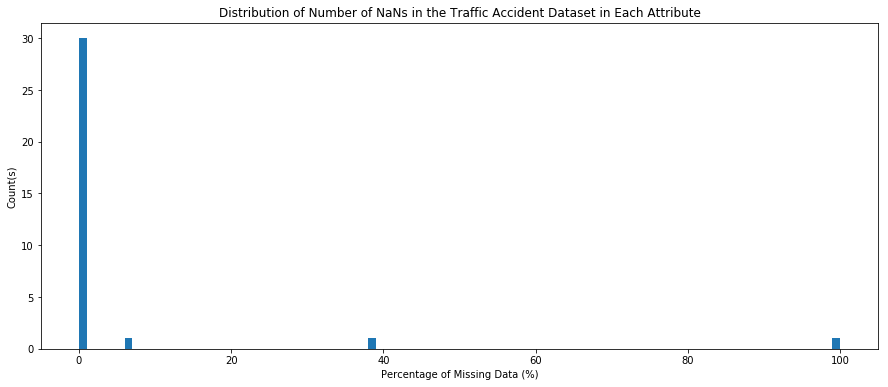

In [4]:
# Count number of NaNs in each attribute
null_number = data.isnull().sum()
plt.figure(figsize=(15, 6))
plt.title('Distribution of Number of NaNs in the Traffic Accident Dataset in Each Attribute')
plt.hist(null_number / data.shape[0] * 100, bins=100)
plt.xlabel('Percentage of Missing Data (%)')
plt.ylabel('Count(s)')
plt.show()

----
## Data Preparation

This section is mainly for dropping and imputing the attributes in the dataset, so that the dataset we're dealing with contains only useful information that will help us with the analysis. 

In [5]:
# Peek at attributes with under and over 1% of missing values
data_under_1 = (null_number / len(data) * 100) <= 1
data_over_1 = (null_number / len(data) * 100) > 1
attri_over_1 = null_number.loc[(null_number / data.shape[0] * 100) > 1]
print("Attributes with equal to or under 1% of missing data: {}".format(data_under_1.sum()))
print("Attributes with over 1% of missing data: {}".format(data_over_1.sum()))
print("Attributes with missing data that exceeds 1%: \n{}".format(attri_over_1 / data.shape[0] * 100))

Attributes with equal to or under 1% of missing data: 30
Attributes with over 1% of missing data: 3
Attributes with missing data that exceeds 1%: 
Junction_Detail              100.000000
Junction_Control              38.435798
LSOA_of_Accident_Location      6.179941
dtype: float64


In [6]:
# Use only attributes with less than 1% of missing values for analysis
data = data.drop(['Junction_Detail', 'Junction_Control', 'LSOA_of_Accident_Location'], axis=1)
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2012


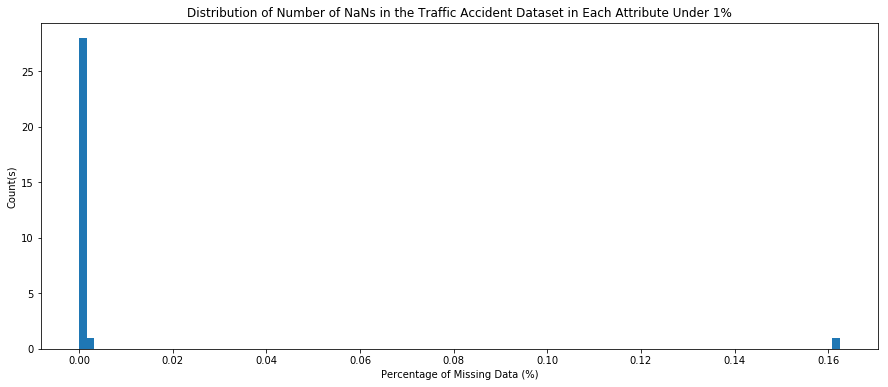

In [7]:
# Plot distribution of missing data under 1% in each attribute
new_null = data.isnull().sum()
plt.figure(figsize=(15, 6))
plt.title('Distribution of Number of NaNs in the Traffic Accident Dataset in Each Attribute Under 1%')
plt.hist(new_null / data.shape[0] * 100, bins=100)
plt.xlabel('Percentage of Missing Data (%)')
plt.ylabel('Count(s)')
plt.show()

In [8]:
# Getting rid of rows that have missing values in attributes: "Accident_Severity", "Number_of_Casualties", "Time", and
# "Weather_Conditions"
data = data.dropna(subset=["Accident_Severity", "Number_of_Casualties", "Time", "Weather_Conditions"])

In [9]:
data.shape

(464684, 30)

In [9]:
# Figure out what kind of data each attribute contains
cat_df = data.select_dtypes(include=['object']).copy()
num_df = data.select_dtypes(include=['int64', 'float64']).copy()
print("Categorical Attributes:", list(cat_df.columns))
print("# of Categorical Attributes:", len(cat_df.columns))
print("Numeric Attributes:", list(num_df.columns))
print("# of Numeric Attributes:", len(num_df.columns))

Categorical Attributes: ['Accident_Index', 'Date', 'Time', 'Local_Authority_(Highway)', 'Road_Type', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']
# of Categorical Attributes: 13
Numeric Attributes: ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Year']
# of Numeric Attributes: 17


In [10]:
# Get rid of rows with 'Unknown' value for 'Road_Type' and 'Weather_Conditions' attributes
data = data.loc[data['Road_Type'] != 'Unknown']
data = data.loc[data['Weather_Conditions'] != 'Unknown']

In [11]:
# Dropping categorical attributes that won't help with the analysis
new_data = data.drop(['Accident_Index', 'Local_Authority_(Highway)', 'Date', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Local_Authority_(District)'], axis=1)
cat_df = cat_df.drop(['Accident_Index', 'Local_Authority_(Highway)', 'Date', 'Time', 'Did_Police_Officer_Attend_Scene_of_Accident'], axis=1)
num_df = num_df.drop(['Local_Authority_(District)'], axis=1)

In [12]:
# Converting 'Time' to int by flooring the time for better training
new_data["Time"] = new_data["Time"].astype(str)
new_data['Time'] = new_data['Time'].str.slice(0, 2, 1)
new_data["Time"] = new_data["Time"].astype(int)

In [13]:
new_data['Time'].head()

0    20
1    17
2    10
3    12
4    20
Name: Time, dtype: int32

In [14]:
# Imputation for missing values by computing mode of each attribute
for col in cat_df.columns:
    new_data[col].fillna((new_data[col].mode()[0]), inplace=True)

# Imputation for categorical attributes by creating dummy variables for each attribute
for col in cat_df.columns:
    try:
        new_data = pd.concat([new_data.drop(col, axis=1), pd.get_dummies(new_data[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)
    except Exception as e:
        print(e)

# Imputation for missing values in numeric attributes by computing mean of each attribute
for col in num_df.columns:
    new_data[col].fillna((new_data[col].mean()), inplace=True)

In [15]:
new_data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured)
0,527200,178760,-0.169101,51.493429,1,3,2,1,5,20,...,1,0,0,0,0,0,0,1,0,0
1,524930,181430,-0.200838,51.517931,1,3,2,1,4,17,...,1,0,0,0,0,0,0,1,0,0
2,525860,178080,-0.188636,51.487618,1,3,2,1,3,10,...,1,0,0,0,0,0,0,1,0,0
3,524980,181030,-0.200259,51.514325,1,3,1,1,4,12,...,1,0,0,0,0,0,0,1,0,0
4,526170,179200,-0.183773,51.497614,1,3,1,1,3,20,...,1,0,0,0,0,0,0,1,0,0


In [16]:
# Check if any attribute contains missing values
if (new_data.isnull().sum().sum() == 0):
    print("Every attribute contains no missing values!")
else:
    print(new_data.isnull().sum().sum())
    print("Make sure attributes don't have missing values for analysis.")

Every attribute contains no missing values!


In [17]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455016 entries, 0 to 464696
Data columns (total 55 columns):
Location_Easting_OSGR                                                                  455016 non-null int64
Location_Northing_OSGR                                                                 455016 non-null int64
Longitude                                                                              455016 non-null float64
Latitude                                                                               455016 non-null float64
Police_Force                                                                           455016 non-null int64
Accident_Severity                                                                      455016 non-null int64
Number_of_Vehicles                                                                     455016 non-null int64
Number_of_Casualties                                                                   455016 non-null int64
Day_of_Week  

----
## Model Data

In this section, I will make use of various data analysis techniques to answer the 4 questions in interest.  

### Question 1


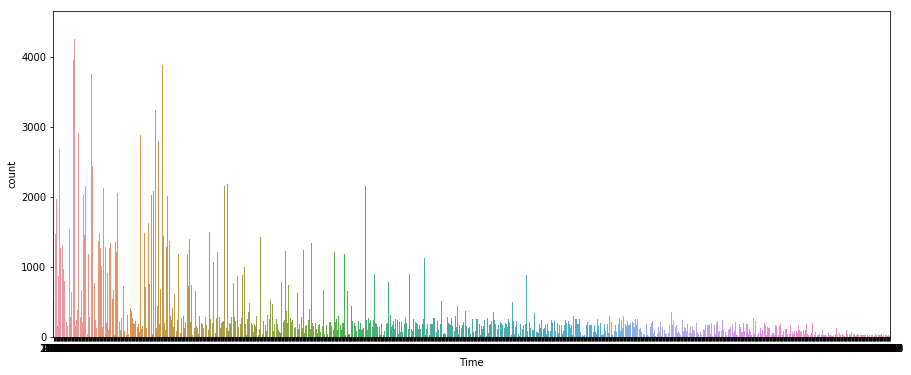

In [18]:
# Q: What time of the day do accidents happen more?
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(data['Time'])

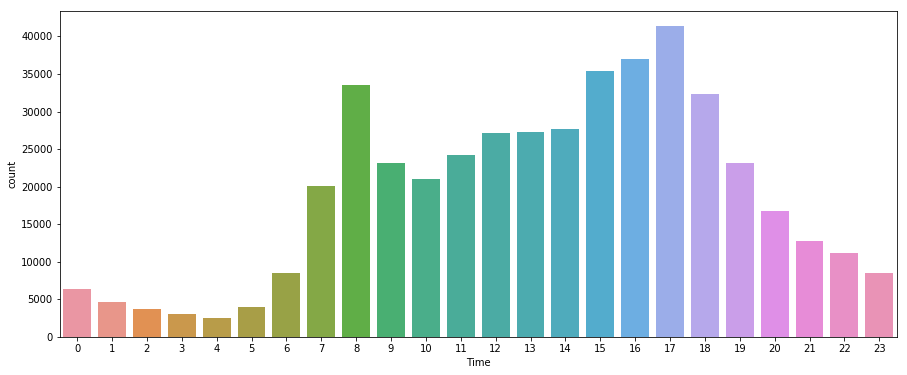

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(new_data['Time'])

In [179]:
# Select only the times that have equal to or over 3000 counts
over_3000 = data['Time'].value_counts() >= 3000
attri_over_3000 = over_3000[over_3000 == True]

In [180]:
attri_over_3000

17:00    True
17:30    True
18:00    True
16:00    True
15:30    True
16:30    True
15:00    True
08:30    True
18:30    True
13:00    True
14:00    True
Name: Time, dtype: bool

### Answer for Question 1
As seen from the list above, there are a total of 12 time periods that have equal to or over 3000 recorded accident counts. Thus, the answer to the question about what time in the day do accidents happen more is mainly between 3 to 6pm. The analysis makes sense because 3 to 6pm is usually the prime rush hour period, and so it is more likely to have led to accidents.  

### Question 2

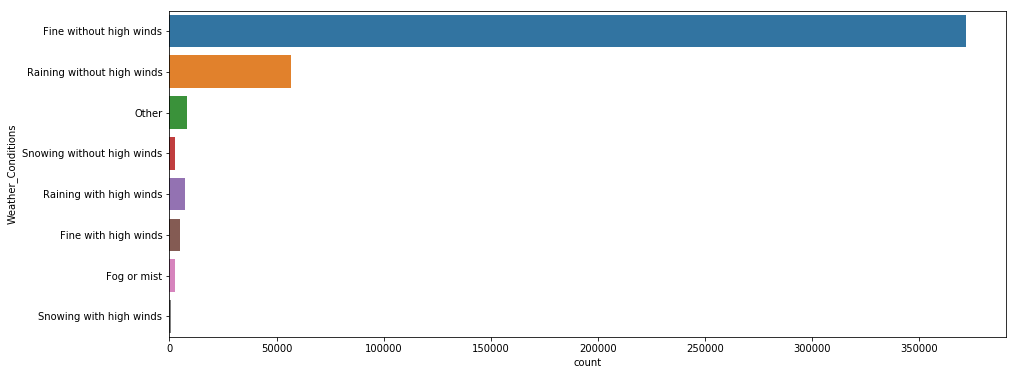

In [201]:
# Q: What kind of weather is most likely to lead to accidents?
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(y='Weather_Conditions', data=data)

### Answer for Question 2
From the bar graph above, we can see how the kind of weather that would most likely lead to accidents is a fine weather without any high winds, which is followed by a rainy weather without high winds. From this analysis, we have gained an useful insight that weather conditions don't seem to contribute much to the rate of accidents, because most accidents happen during a good weather according to the accident data collected.    

### Question 3

In [141]:
# Function used to fit data to a linear regression model for prediction
def fit_and_pred(df, res_col, test_size=.3, rand_state=42):
    X = df.drop(res_col, axis=1)
    y = df[res_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    data = [X_train, X_test, y_train, y_test]
    
    # AdaBoostClassifier
    ada_clf = AdaBoostClassifier()
    param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}
    random_search_ada = RandomizedSearchCV(ada_clf, param_distributions=param_dist)
    random_search_ada.fit(X_train, y_train)
    ada_preds = random_search_ada.best_estimator_.predict(X_test)
    
    # RandomForestClassifier
    rf_clf = RandomForestClassifier()
    param_dist = {"max_depth": [3, None],
                  "n_estimators": list(range(10, 200)),
                  "max_features": list(range(1, X_test.shape[1]+1)),
                  "min_samples_split": list(range(2, 11)),
                  "min_samples_leaf": list(range(1, 11)),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}
    random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist)
    random_search_rf.fit(X_train, y_train)
    rf_preds = random_search_rf.best_estimator_.predict(X_test)
    
    return ada_clf, rf_clf, random_search_ada, random_search_rf, ada_preds, rf_preds, X_train, y_test, X, y

In [147]:
# Calculate accuracy and cross validation scores
def accuracy_cv_score(ada_clf, rf_clf, ada_preds, rf_preds, y_test, X, y, cv=3):
    # Accuracy Score
    ada_accu = accuracy_score(y_test, ada_preds)
    rf_accu = accuracy_score(y_test, rf_preds)
    print("Accuracy score for AdaBoost is {}.\nAccuracy score for RandomForest is {}.\n".format(ada_accu, rf_accu))
    
    # CV Score
    ada_cv = cross_val_score(ada_clf, X, y, cv=cv)
    rf_cv = cross_val_score(rf_clf, X, y, cv=cv)
    print("CV scores for AdaBoost are {}.\nCV scores for RandomForest are {}.".format(ada_cv, rf_cv))
    print("Mean CV score for AdaBoost is {}.\nMean CV score for RandomForest is {}.".format(np.mean(ada_cv), 
                                                                                                    np.mean(rf_cv)))

In [156]:
# Function for calculating attributes' weights
def feature_weights(rs, X_train, num_of_attri=8):
    features = X_train.columns[:X_train.shape[1]]
    weights = rs.best_estimator_.feature_importances_
    indices = np.argsort(weights)
    
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.title("Top {} Features' Weights".format(num_of_attri))
    plt.barh(range(len(indices[::-1][num_of_attri-1::-1])), weights[indices[::-1][num_of_attri-1::-1]], color='b', 
             align='center')
    plt.yticks(range(len(indices[::-1][num_of_attri-1::-1])), features[indices[::-1][num_of_attri-1::-1]])
    plt.xlabel('Relative Weights')

In [146]:
# Q: How well can we predict an accident's severity? What factors correlate most to accidents' severity?
ada_clf, rf_clf, rs_ada, rs_rf, ada_preds, rf_preds, X_train, y_test, X, y = fit_and_pred(new_data, 'Accident_Severity')

In [158]:
# Default cv = 3
accuracy_cv_score(ada_clf, rf_clf, ada_preds, rf_preds, y_test, X, y, cv=5)

Accuracy score for AdaBoost is 0.8446357276290246.
Accuracy score for RandomForest is 0.8533240540639537.

CV scores for AdaBoost are [ 0.84422834  0.84409648  0.84417925  0.84409134  0.8442232 ].
CV scores for RandomForest are [ 0.76396901  0.80863689  0.81988308  0.82826751  0.59243753].
Mean CV score for AdaBoost is 0.8441637217325949.
Mean CV score for RandomForest is 0.7626388039434246.


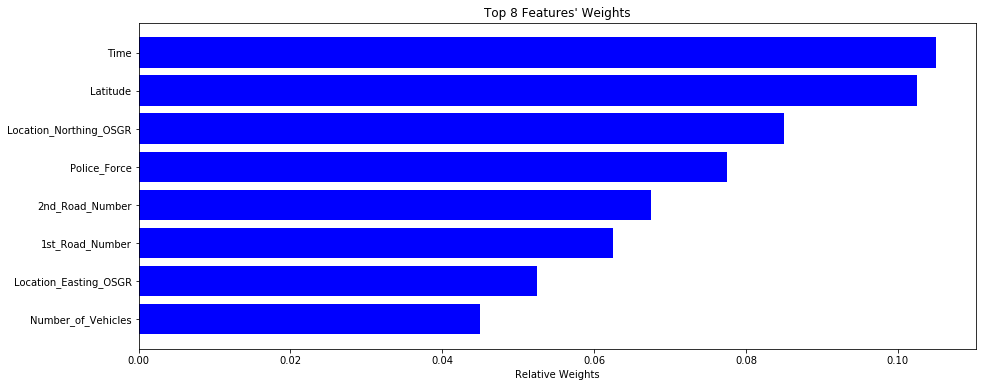

In [159]:
# Choosing AdaBoostClassifier as model
# Default num_of_attri = 8
feature_weights(rs_ada, X_train)

### Answer for Question 3
I chose adaboost and random forest classifier as the two classifiers to predict and determine the severity of the accidents. After performing randomized grid search on the two classifiers, adaboost achieved the higher cross validation score of 84% but lower accuracy score of 84%, whereas random forest achieved a cross validation and accuracy score of 76% and 85% respectively. I chose to use adaboost as my classifier since it has more consistent score values. From the bar graph above, we can see how that the top three attributes that contribute the most to the severity of accidents are 'Time', 'Latitude', and 'Location_Northing_OSGR'. In summary, this analysis provides us with further insight about how important the time of the day and location are to the severity of accidents.    


### Question 4

In [160]:
# Q: How well can we predict the nu  mber of casualties in an accident? What factors correlate most to accidents' casualties?
ada_clf, rf_clf, rs_ada, rs_rf, ada_preds, rf_preds, X_train, y_test, X, y = fit_and_pred(new_data, 'Number_of_Casualties')

C:\Users\jonat\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [161]:
# Default cv = 3
accuracy_cv_score(ada_clf, rf_clf, ada_preds, rf_preds, y_test, X, y, cv=5)

Accuracy score for AdaBoost is 0.7775246327973334.
Accuracy score for RandomForest is 0.7857880663711952.



C:\Users\jonat\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CV scores for AdaBoost are [ 0.77652539  0.77655319  0.77674725  0.77679847  0.77682163].
CV scores for RandomForest are [ 0.75907982  0.69931653  0.7579011   0.76670989  0.72544236].
Mean CV score for AdaBoost is 0.7766891868743868.
Mean CV score for RandomForest is 0.7416899400183347.


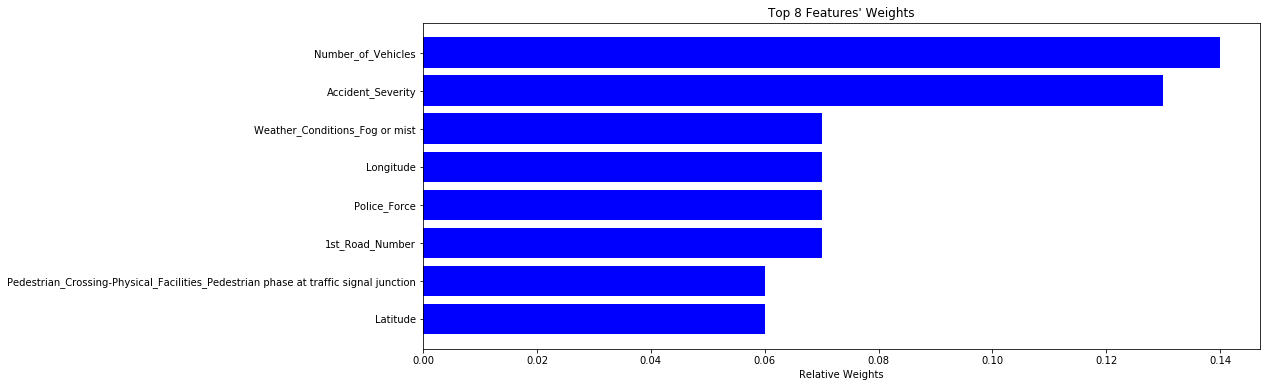

In [162]:
# Choosing AdaBoostClassifier as model
# Default num_of_attri = 8
feature_weights(rs_ada, X_train)

### Answer for Question 4
Similar to the procedure done in question 3, adaboost is chosen over random forest as the classifier for the analysis for this question, because of its consistency and its accuracy and cross validation score of 77.7% and 77.6% respectively. The bar graph above shows that the top 3 attributes that contribute the most to the number of casualties are 'Number_of_Vehicles', 'Accident_Severity', and 'Weather_Conditions_Fog or mist'. The results make sense, because the number of casualties or number of people involved in accidents are dependent on the number of vehicles involved in the accidents and the severity of the accidents. Also, if the weather is foggy or misty, there is a higher chance that drivers would not see passengers on the streets or the cars around them clearly.   